In [4]:
# import libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

In [5]:
# import dataset

df_train = pd.read_csv("train.csv")


df_test = pd.read_csv("test.csv")


df_gender = pd.read_csv("gender_submission.csv")

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.shape

(891, 12)

In [8]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

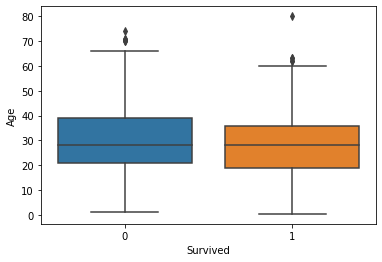

In [11]:
sns.boxplot(y = "Age", x ="Survived", data = df_train)

In [12]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


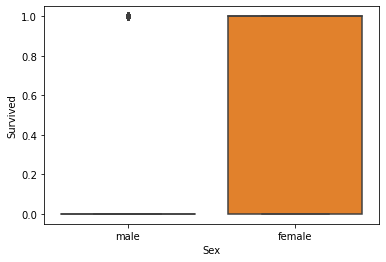

In [14]:
sns.boxplot(x = "Sex", y ="Survived", data = df_train)

# DATA CLEANING

In [15]:
# dropping the cabin

df_train.drop("Cabin", axis = 1, inplace = True)


df_test.drop("Cabin", axis = 1, inplace = True)

In [16]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [18]:
df_train["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [19]:
# Training Data replacing the median age

print("Training Data")


print("First class median age:",df_train[df_train["Pclass"]==1]["Age"].median())

print("Second class median age:",df_train[df_train["Pclass"]==2]["Age"].median())

print("Third class median age:",df_train[df_train["Pclass"]==3]["Age"].median())

Training Data
First class median age: 37.0
Second class median age: 29.0
Third class median age: 24.0


In [20]:
# Training Data replacing the median age

print("Test Data")


print("First class median age:",df_test[df_test["Pclass"]==1]["Age"].median())

print("Second class median age:",df_test[df_test["Pclass"]==2]["Age"].median())

print("Third class median age:",df_test[df_test["Pclass"]==3]["Age"].median())

Test Data
First class median age: 42.0
Second class median age: 26.5
Third class median age: 24.0


In [21]:
# To fill the missing value
# creating a function for imputation in training data

def impute_age_train(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):     # Pandas libraries to get null values
        if Pclass == 1:
            return 37.0
        elif Pclass == 2:
            return 29.0
        else:
            return 24.0
        
    else:
        return Age
        

In [22]:
# To fill the missing value
# creating a function for imputation in training data

def impute_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):     # Pandas libraries to get null values
        if Pclass == 1:
            return 42.0
        elif Pclass == 2:
            return 26.5
        else:
            return 24.0
        
    else:
        return Age

In [23]:
# Apply the imputation

# train 
df_train["Age"] = df_train[["Age", "Pclass"]].apply(impute_age_train, axis = 1)

# test
df_test["Age"] = df_test[["Age", "Pclass"]].apply(impute_age_test, axis = 1)

In [24]:
# Replace the embark code

df_train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [25]:
df_train["Embarked"] = df_train["Embarked"].fillna("S")  # modify this result later by using the mode value

#### Fare column  for the test set


In [26]:
print("The mean of people in Third class: ",df_test[df_test["Pclass"]==3]["Fare"].mean())


The mean of people in Third class:  12.459677880184334


In [27]:
# Fill the fare 

df_test["Fare"] = df_test["Fare"].fillna(12.459)

In [28]:
# checking for null

df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [29]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [30]:
# Dropping some irrelevant features (Namem and Ticket Features)

df_train.drop(["Name", "Ticket"], axis = 1, inplace = True)


df_test.drop(["Name", "Ticket"], axis = 1, inplace = True)


In [31]:
df_train.shape

(891, 9)

In [32]:
df_test.shape

(418, 8)

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


# Feature Engineering

We need to encode the categorical data 

### Encoding Categorical data  

We can encode the categorical data uisng pandas `pd.get_dummies(x)` or using sklearn libraries  


In [38]:
# Using OneHotEncoder and LabelEncoder

# import library

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# from  sklearn.compose import ColumnTransformer (learn when to use Column Tranformer


In [40]:
# Replacing the categorical data 

non_num = ["Sex", "Embarked"]
for num in non_num:
    df_train[num] = LabelEncoder().fit_transform(df_train[num])
    df_test[num] = LabelEncoder().fit_transform(df_test[num])

In [41]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


### Splitting Dataset into Training and Test set   

We will build our ML model using traqin set while we test the performance of our model using the test set and compare the result with the given titanic test dataset. First select the features we need to build our model. 

In [42]:
# features selection 

X = df_train.drop("Survived", axis = 1)
y = df_train["Survived"]

In [47]:
X.dtypes

PassengerId      int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object

In [48]:
y.dtypes

dtype('int64')

As we can observe that our features are in object type, we need to transform it to a numerical value using `numpy`

In [51]:
# transforming the features

from sklearn.compose import ColumnTransformer as ct

X_new = np.array(X, dtype = np.float)

In [55]:
X_new.dtype

dtype('float64')

In [56]:
X_new.shape

(891, 8)

Since the target and the features are now numerical, let's begin to train the model

In [122]:
# import libraries 

from sklearn.model_selection import train_test_split

# create train, test set for the X_new and y

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 34)

### Feature scaling  

Most ML model deals with Euclidean distance( which is a distance between two points. If the scale difference between variables are too far apart, it is an issue for ML model. So there is need for scaling.

In [123]:
# import library
from sklearn.preprocessing import StandardScaler

# create an object of the class
sc = StandardScaler()

In [124]:
# tranform the object and fit the features

X_train = sc.fit_transform(X_train)

X_test = sc.fit_transform(X_test)

### Building the ML Models

####  -  Logistic Regression Model

In [125]:
# import library

from sklearn.linear_model import LogisticRegression

# create an object of the class

LModel = LogisticRegression()

# fit the moel to the training set

LModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
# display the predict score for train and test 

print("Training score prediction: {}".format(LModel.score(X_train,y_train)))

print("Test score prediction: {}".format(LModel.score(X_test,y_test)))

print("Bias in the prediction: {}".format(LModel.score(X_train,y_train) - LModel.score(X_test,y_test)))


Training score prediction: 0.7945425361155698
Test score prediction: 0.8134328358208955
Bias in the prediction: -0.01889029970532574


In [88]:
# Predict the test set results
L_pred1 = LModel.predict(X_test)

In [100]:
""" 
# visulaizing the redult

plt.scatter(X_new, y)
plt.plot(X_new, L_pred1(X_new), color = "red")
plt.title("Titanic Data(Logistic Model)")
plt.xlabel("attributes")
plt.ylabel("survival")
plt.show()
+++++
"""


' \n# visulaizing the redult\n\nplt.scatter(X_new, y)\nplt.plot(X_new, L_pred1(X_new), color = "red")\nplt.title("Titanic Data(Logistic Model)")\nplt.xlabel("attributes")\nplt.ylabel("survival")\nplt.show()\n+++++\n'

In [127]:
# Building a confusion matrix for the prediction

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, L_pred1)

In [128]:
cm

array([[147,  21],
       [ 29,  71]], dtype=int64)